In [2]:
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from tensorflow.keras.models import model_from_json
from tensorflow.keras import Model as model

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.listdir()

['.config', 'drive', 'sample_data']

In [5]:
labeling_job = ImageDataGenerator(rescale=1./255)

In [6]:
training_label = labeling_job.flow_from_directory('/content/drive/My Drive/fruit/Training',target_size=(260,260),batch_size=32)
testing_label = labeling_job.flow_from_directory('/content/drive/My Drive/fruit/Test',target_size=(260,260),batch_size=32,classes=training_label.class_indices)
valid_label = labeling_job.flow_from_directory('/content/drive/My Drive/fruit/Validation',target_size=(260,260),batch_size=32,classes=training_label.class_indices)

Found 6235 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.
Found 3114 images belonging to 24 classes.


In [7]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(260,260,3)))
model.add(MaxPool2D((3,3)))

for i in range(6,9):
  model.add(Conv2D(2**i,(3,3)))
  model.add(MaxPool2D((3,3)))

model.add(MaxPool2D((2,2)))
model.add(Flatten())

model.add(Dense(training_label.num_classes,activation='softmax'))

In [8]:
training_label.num_classes

24

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(training_label,epochs=10,validation_data=valid_label)

Epoch 1/10
195/195 [==============================] - 4972s 26s/step - loss: 0.5836 - accuracy: 0.8151 - val_loss: 0.0800 - val_accuracy: 0.9672
Epoch 2/10
195/195 [==============================] - 471s 2s/step - loss: 0.1115 - accuracy: 0.9665 - val_loss: 0.0262 - val_accuracy: 0.9913
Epoch 3/10
195/195 [==============================] - 468s 2s/step - loss: 0.0066 - accuracy: 0.9984 - val_loss: 7.8255e-04 - val_accuracy: 1.0000
Epoch 4/10
195/195 [==============================] - 466s 2s/step - loss: 5.9616e-04 - accuracy: 1.0000 - val_loss: 4.4575e-04 - val_accuracy: 1.0000
Epoch 5/10
195/195 [==============================] - 480s 2s/step - loss: 3.7209e-04 - accuracy: 1.0000 - val_loss: 2.8710e-04 - val_accuracy: 1.0000
Epoch 6/10
195/195 [==============================] - 464s 2s/step - loss: 2.5059e-04 - accuracy: 1.0000 - val_loss: 2.1286e-04 - val_accuracy: 1.0000
Epoch 7/10
195/195 [==============================] - 465s 2s/step - loss: 1.8458e-04 - accuracy: 1.0000 - val_l

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 258, 258, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 86, 86, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 84, 84, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 256)         2

Correct class for image apple_red_yellow_1 
Predicted class for image apple_red_yellow_1 


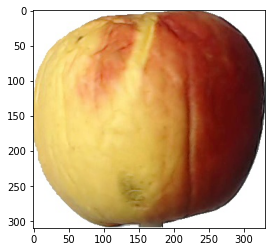

Correct class for image apple_red_yellow_1 
Predicted class for image apple_red_yellow_1 


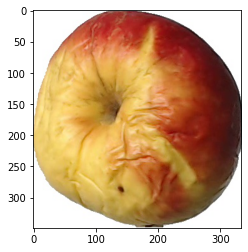

Correct class for image apple_red_yellow_1 
Predicted class for image apple_red_yellow_1 


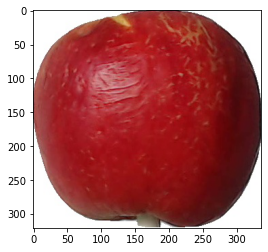

Correct class for image apple_red_yellow_1 
Predicted class for image apple_red_yellow_1 


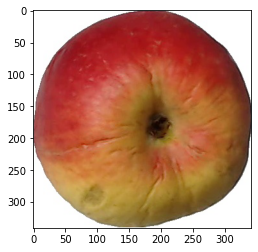

Correct class for image apple_rotten_1 
Predicted class for image apple_hit_1 


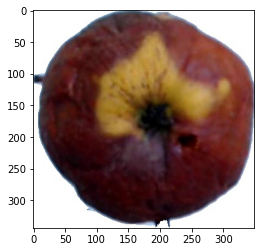

Correct class for image apple_rotten_1 
Predicted class for image apple_pink_lady_1 


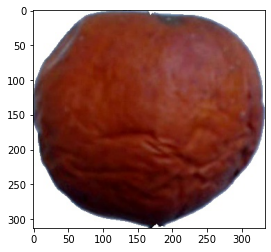

Correct class for image apple_rotten_1 
Predicted class for image apple_hit_1 


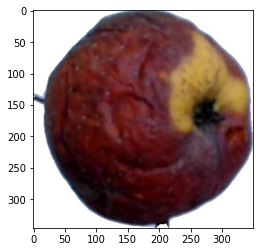

Correct class for image apple_rotten_1 
Predicted class for image apple_rotten_1 


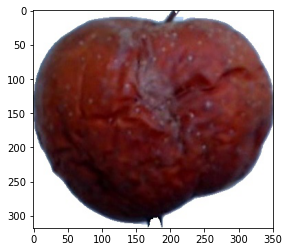

Correct class for image zucchini_1 
Predicted class for image zucchini_1 


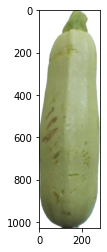

Correct class for image zucchini_1 
Predicted class for image zucchini_1 


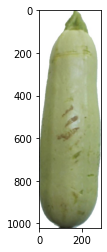

Correct class for image zucchini_1 
Predicted class for image zucchini_1 


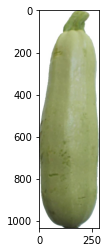

Correct class for image zucchini_1 
Predicted class for image zucchini_1 


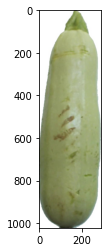

Correct class for image apple_red_delicios_1 
Predicted class for image apple_red_delicios_1 


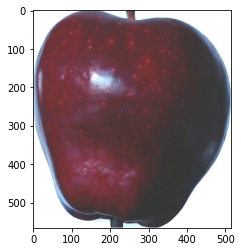

Correct class for image apple_red_delicios_1 
Predicted class for image apple_red_delicios_1 


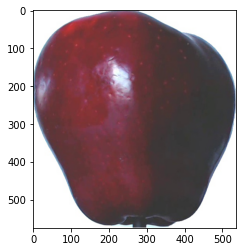

Correct class for image apple_red_delicios_1 
Predicted class for image apple_red_delicios_1 


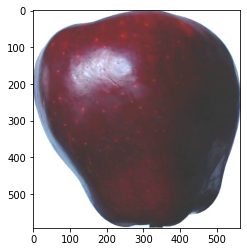

Correct class for image apple_red_delicios_1 
Predicted class for image apple_red_delicios_1 


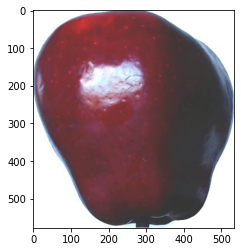

Correct class for image apple_granny_smith_1 
Predicted class for image apple_golden_2 


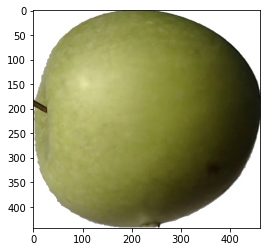

Correct class for image apple_granny_smith_1 
Predicted class for image apple_golden_2 


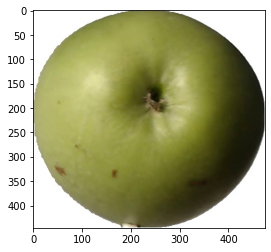

Correct class for image apple_granny_smith_1 
Predicted class for image apple_golden_1 


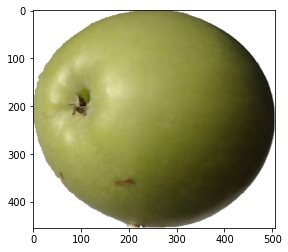

Correct class for image apple_granny_smith_1 
Predicted class for image apple_golden_2 


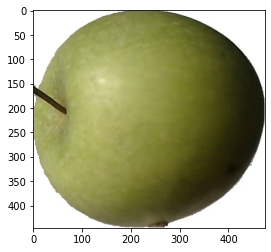

Correct class for image apple_hit_1 
Predicted class for image apple_golden_2 


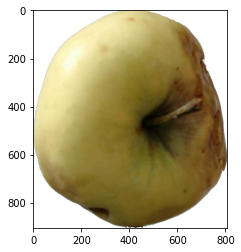

Correct class for image apple_hit_1 
Predicted class for image apple_hit_1 


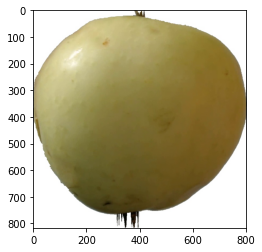

Correct class for image apple_hit_1 
Predicted class for image apple_hit_1 


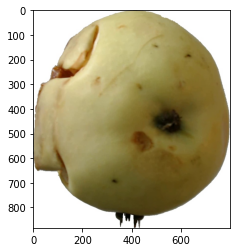

Correct class for image apple_hit_1 
Predicted class for image apple_hit_1 


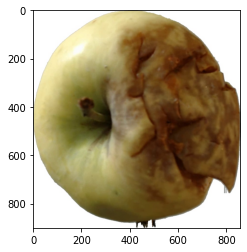

Correct class for image zucchini_dark_1 
Predicted class for image zucchini_1 


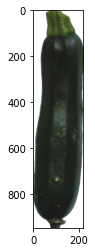

Correct class for image zucchini_dark_1 
Predicted class for image zucchini_1 


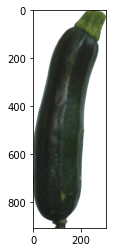

Correct class for image zucchini_dark_1 
Predicted class for image zucchini_dark_1 


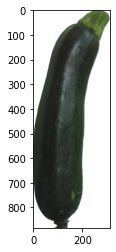

Correct class for image zucchini_dark_1 
Predicted class for image zucchini_1 


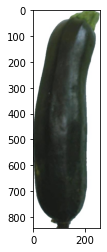

Correct class for image pear_3 
Predicted class for image apple_hit_1 


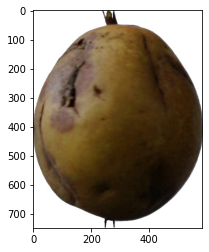

Correct class for image pear_3 
Predicted class for image apple_hit_1 


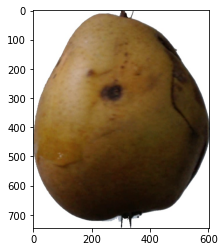

Correct class for image pear_3 
Predicted class for image apple_hit_1 


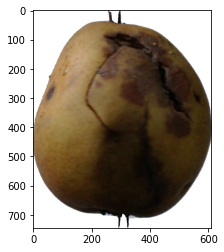

Correct class for image pear_3 
Predicted class for image apple_hit_1 


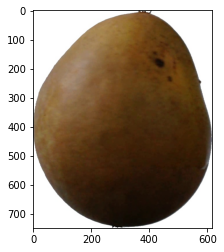

Correct class for image cucumber_3 
Predicted class for image cucumber_3 


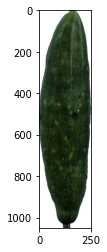

Correct class for image cucumber_3 
Predicted class for image pear_1 


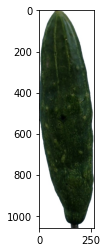

Correct class for image cucumber_3 
Predicted class for image cucumber_3 


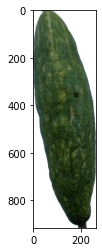

Correct class for image cucumber_3 
Predicted class for image apple_hit_1 


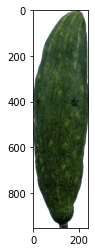

Correct class for image apple_red_2 
Predicted class for image apple_red_yellow_1 


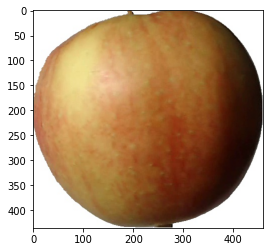

Correct class for image apple_red_2 
Predicted class for image apple_red_yellow_1 


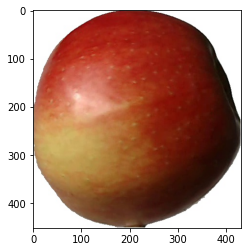

Correct class for image apple_red_2 
Predicted class for image apple_red_yellow_1 


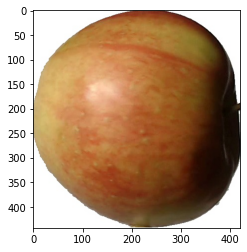

Correct class for image apple_red_2 
Predicted class for image apple_red_yellow_1 


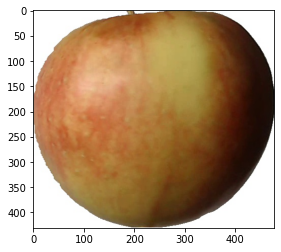

Correct class for image apple_6 
Predicted class for image apple_6 


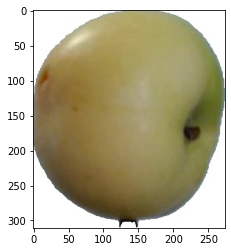

Correct class for image apple_6 
Predicted class for image apple_6 


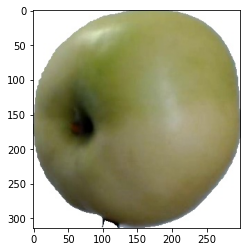

Correct class for image apple_6 
Predicted class for image apple_6 


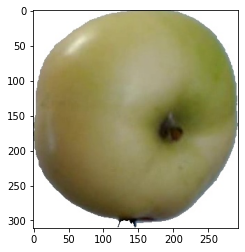

Correct class for image apple_6 
Predicted class for image apple_6 


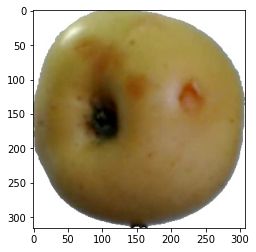

Correct class for image apple_red_3 
Predicted class for image apple_red_2 


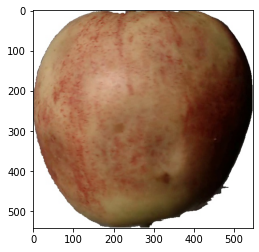

Correct class for image apple_red_3 
Predicted class for image apple_red_yellow_1 


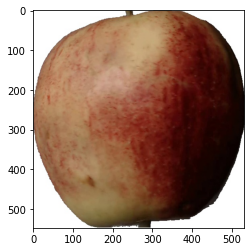

Correct class for image apple_red_3 
Predicted class for image apple_hit_1 


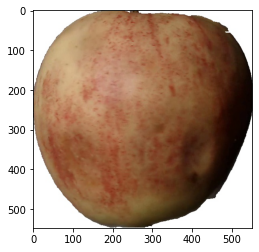

Correct class for image apple_red_3 
Predicted class for image apple_red_yellow_1 


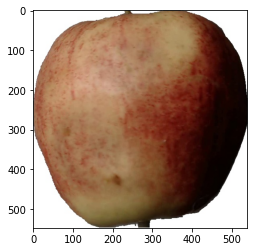

Correct class for image apple_pink_lady_1 
Predicted class for image apple_pink_lady_1 


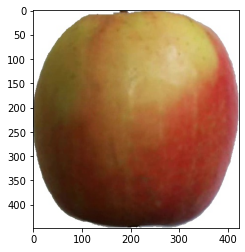

Correct class for image apple_pink_lady_1 
Predicted class for image apple_pink_lady_1 


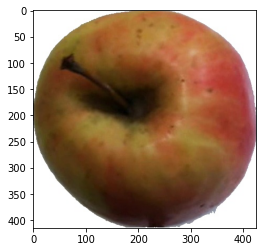

Correct class for image apple_pink_lady_1 
Predicted class for image apple_pink_lady_1 


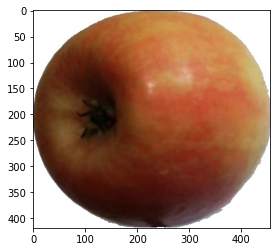

Correct class for image apple_pink_lady_1 
Predicted class for image apple_pink_lady_1 


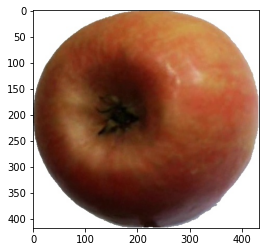

Correct class for image apple_golden_1 
Predicted class for image apple_golden_1 


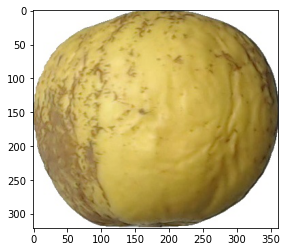

Correct class for image apple_golden_1 
Predicted class for image apple_golden_1 


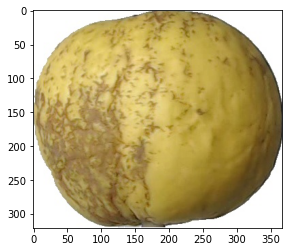

Correct class for image apple_golden_1 
Predicted class for image apple_golden_1 


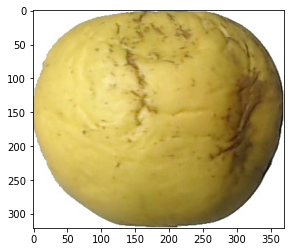

Correct class for image apple_golden_1 
Predicted class for image apple_golden_1 


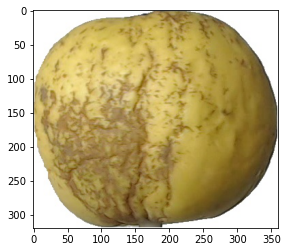

Correct class for image apple_braeburn_1 
Predicted class for image apple_red_yellow_1 


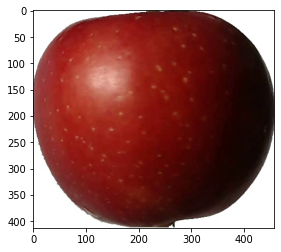

Correct class for image apple_braeburn_1 
Predicted class for image apple_red_yellow_1 


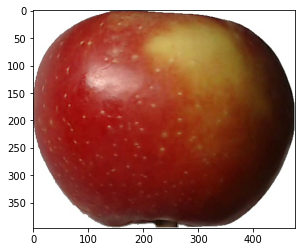

Correct class for image apple_braeburn_1 
Predicted class for image apple_red_yellow_1 


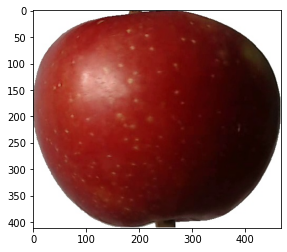

Correct class for image apple_braeburn_1 
Predicted class for image apple_red_yellow_1 


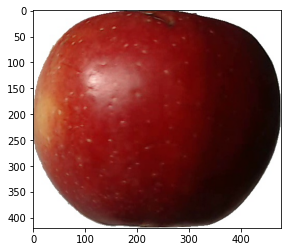

Correct class for image cabbage_white_1 
Predicted class for image cabbage_white_1 


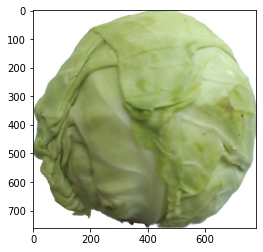

Correct class for image cabbage_white_1 
Predicted class for image apple_golden_2 


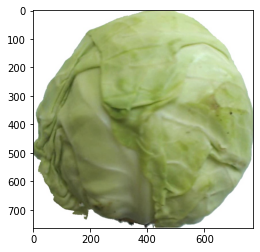

Correct class for image cabbage_white_1 
Predicted class for image cabbage_white_1 


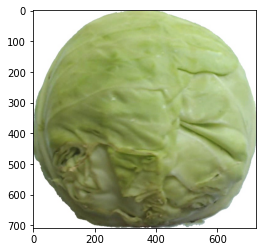

Correct class for image cabbage_white_1 
Predicted class for image cabbage_white_1 


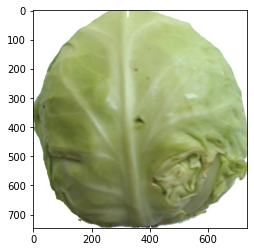

Correct class for image cucumber_1 
Predicted class for image cucumber_1 


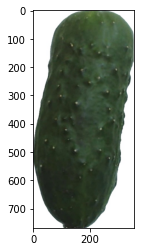

Correct class for image cucumber_1 
Predicted class for image cucumber_1 


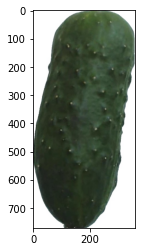

Correct class for image cucumber_1 
Predicted class for image cucumber_1 


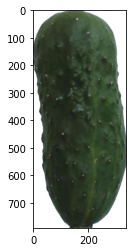

Correct class for image cucumber_1 
Predicted class for image cucumber_1 


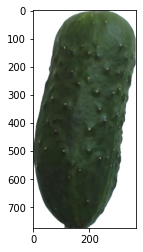

Correct class for image apple_golden_2 
Predicted class for image apple_golden_2 


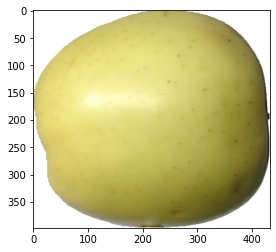

Correct class for image apple_golden_2 
Predicted class for image apple_golden_2 


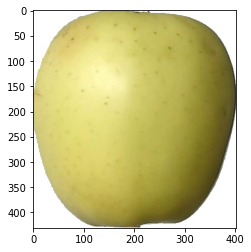

Correct class for image apple_golden_2 
Predicted class for image apple_golden_2 


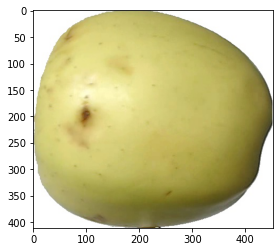

Correct class for image apple_golden_2 
Predicted class for image apple_golden_2 


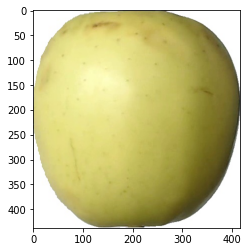

Correct class for image apple_golden_3 
Predicted class for image apple_golden_1 


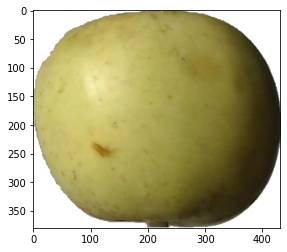

Correct class for image apple_golden_3 
Predicted class for image apple_golden_2 


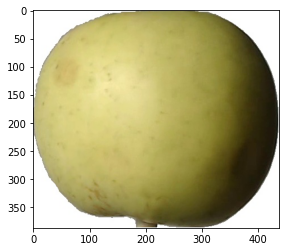

Correct class for image apple_golden_3 
Predicted class for image apple_golden_1 


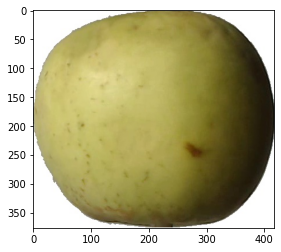

Correct class for image apple_golden_3 
Predicted class for image apple_golden_1 


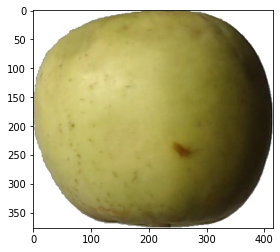

Correct class for image apple_crimson_snow_1 
Predicted class for image apple_pink_lady_1 


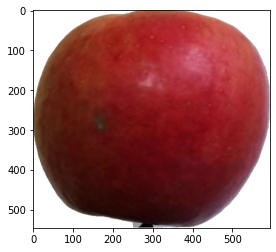

Correct class for image apple_crimson_snow_1 
Predicted class for image apple_pink_lady_1 


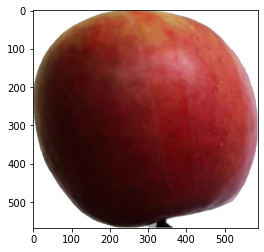

Correct class for image apple_crimson_snow_1 
Predicted class for image apple_pink_lady_1 


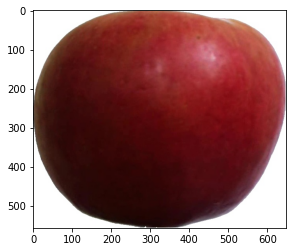

Correct class for image apple_crimson_snow_1 
Predicted class for image apple_pink_lady_1 


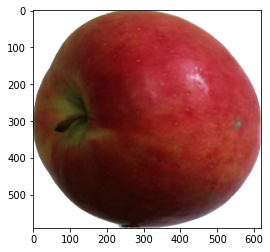

Correct class for image eggplant_violet_1 
Predicted class for image eggplant_violet_1 


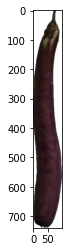

Correct class for image eggplant_violet_1 
Predicted class for image eggplant_violet_1 


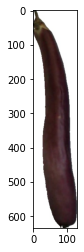

Correct class for image eggplant_violet_1 
Predicted class for image eggplant_violet_1 


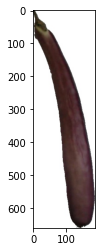

Correct class for image eggplant_violet_1 
Predicted class for image eggplant_violet_1 


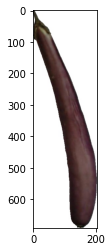

Correct class for image carrot_1 
Predicted class for image carrot_1 


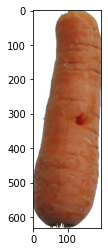

Correct class for image carrot_1 
Predicted class for image carrot_1 


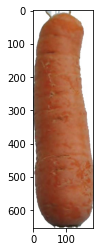

Correct class for image carrot_1 
Predicted class for image carrot_1 


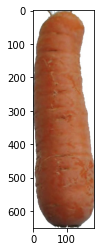

Correct class for image carrot_1 
Predicted class for image carrot_1 


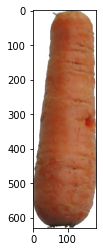

Correct class for image apple_red_1 
Predicted class for image apple_red_yellow_1 


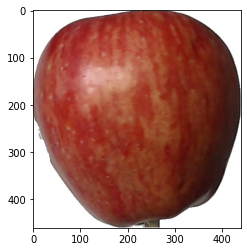

Correct class for image apple_red_1 
Predicted class for image apple_red_yellow_1 


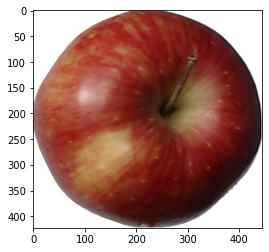

Correct class for image apple_red_1 
Predicted class for image apple_red_1 


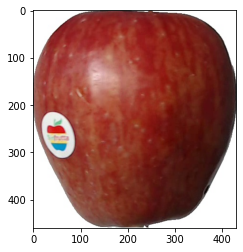

Correct class for image apple_red_1 
Predicted class for image apple_red_yellow_1 


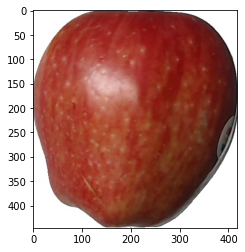

Correct class for image pear_1 
Predicted class for image apple_golden_2 


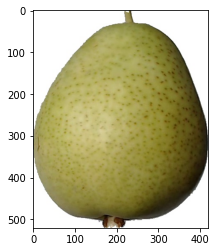

Correct class for image pear_1 
Predicted class for image apple_golden_2 


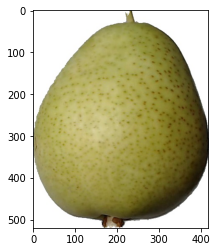

Correct class for image pear_1 
Predicted class for image apple_golden_2 


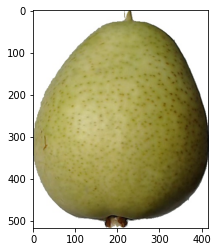

Correct class for image pear_1 
Predicted class for image apple_golden_2 


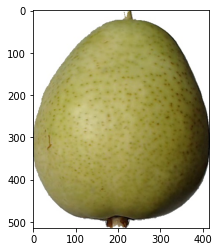

In [12]:
testing_path = '/content/drive/My Drive/fruit/Test'

for i in os.listdir(testing_path):
  for j in os.listdir(os.path.join(testing_path,i))[:4]:
    my_image=load_img(os.path.join(testing_path,i,j))
    x=np.expand_dims(my_image.resize((260,260)),axis=0)
    y=model.predict(x)
    y_class= y.argmax()
    plt.imshow(my_image)
    print('Correct class for image {} '.format(i))
    print('Predicted class for image {} '.format(list(training_label.class_indices.keys())[y_class]))
    plt.show()

In [13]:
list(training_label.class_indices.keys())[y.argmax()]

'apple_golden_2'

In [14]:
y_pred=[]
y_act =[]
testing_label.reset()
for i in range(len(testing_label.filenames)):
  X,Y= testing_label.next()
  y_pred.append(model.predict(X).argmax())
  y_act.append(Y.argmax())
  

In [26]:
pred_list=[]
act_list=[]

In [60]:
pred_list=[list(training_label.class_indices.keys())for i in y_pred]
act_list=[list(training_label.class_indices.keys()) for i in y_act]

In [ ]:
out_df=pd.DataFrame(np.vstack([pred_list,act_list]).T,columns=['Predicted_class','Actual_class'])

In [58]:
confusion_matrix = pd.crosstab(out_df['Actual_class'],out_df['Predicted_class'],rownames=['Actual'],colnames=['Predicted'])

In [59]:
confusion_matrix

Predicted             apple_crimson_snow_1
Actual                                    
apple_6                                160
apple_braeburn_1                       163
apple_crimson_snow_1                   166
apple_golden_1                         153
apple_golden_2                         150
apple_golden_3                         147
apple_granny_smith_1                   164
apple_hit_1                            255
apple_pink_lady_1                      157
apple_red_1                            156
apple_red_2                            167
apple_red_3                            157
apple_red_delicios_1                   142
apple_red_yellow_1                     156
apple_rotten_1                         147
cabbage_white_1                         43
carrot_1                                43
cucumber_1                              45
cucumber_3                              77
eggplant_violet_1                       94
pear_1                                 165
pear_3                                  58
zucchini_1                              73
zucchini_dark_1                         72

In [64]:
import seaborn as sn

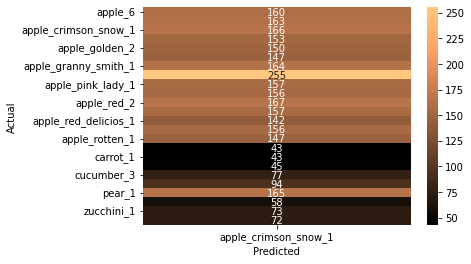

In [66]:
sn.heatmap(confusion_matrix,cmap='copper',annot=True,fmt='d' )
plt.show()

In [21]:
x.shape

(1, 260, 260, 3)

In [ ]:
y

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y.argmax()

25

In [ ]:
x.shape

(1, 260, 260, 3)

In [ ]:
y

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
training_label.class_indices

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

In [ ]:
testing_label.class_indices

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap